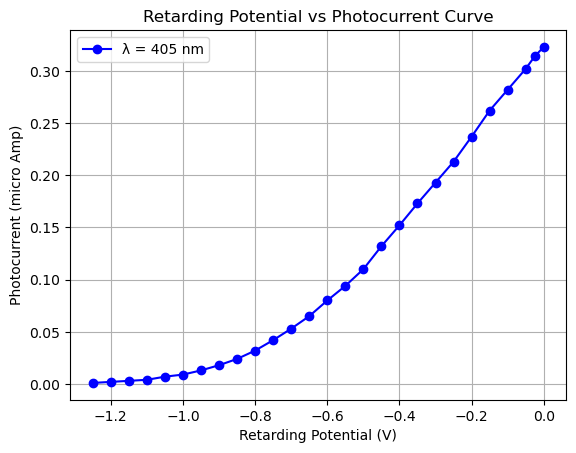

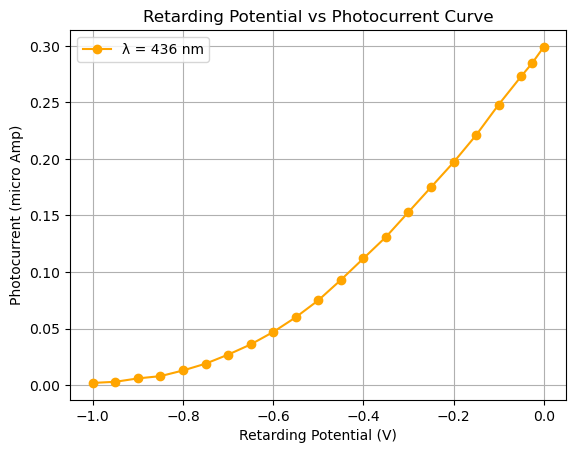

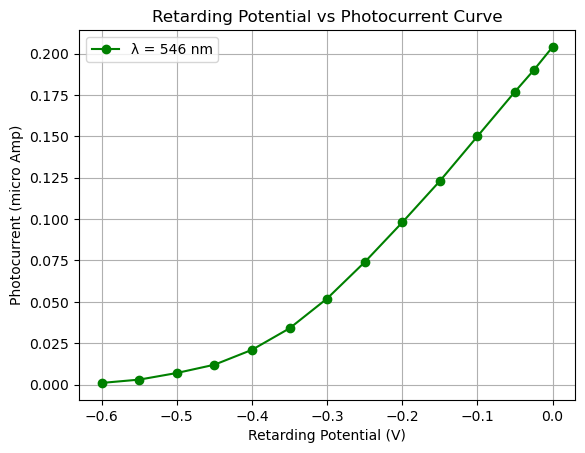

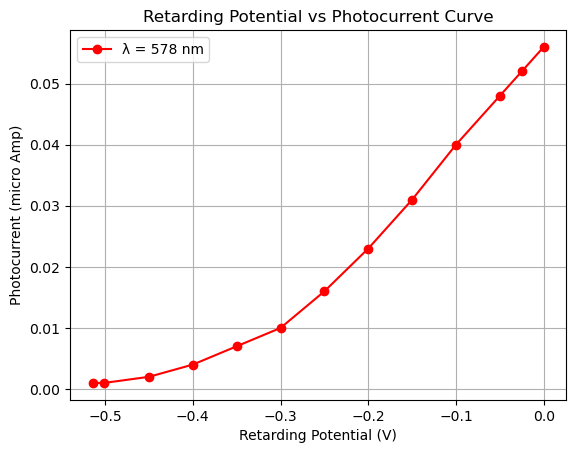

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Load the Excel file
file_path = 'Photoelectric_Data.xlsx'
df = pd.read_excel(file_path)

# For Lambda = 405
x405 = df.iloc[3:31, 0].tolist()
y405 = df.iloc[3:31, 2].tolist()
plt.plot(x405, y405, ls='-', marker='o', color="blue", markerfacecolor="blue", label="λ = 405 nm")
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Photocurrent (micro Amp)")
plt.title("Retarding Potential vs Photocurrent Curve")
plt.grid()
plt.legend()
plt.show()

# For Lambda = 436
x436 = df.iloc[3:26, 4].tolist()
y436 = df.iloc[3:26, 6].tolist()
plt.plot(x436, y436, ls='-', marker='o', color="orange", markerfacecolor="orange", label="λ = 436 nm")
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Photocurrent (micro Amp)")
plt.title("Retarding Potential vs Photocurrent Curve")
plt.grid()
plt.legend()
plt.show()

# For Lambda = 546
x546 = df.iloc[3:18, 8].tolist()
y546 = df.iloc[3:18, 10].tolist()
plt.plot(x546, y546, ls='-', marker='o', color="Green", markerfacecolor="Green", label="λ = 546 nm")
plt.xlabel("Retarding Potential (V)")
plt.ylabel("Photocurrent (micro Amp)")
plt.title("Retarding Potential vs Photocurrent Curve")
plt.grid()
plt.legend()
plt.show()

# For Lambda = 578
x578 = df.iloc[3:17, 12].tolist()
y578 = df.iloc[3:17, 14].tolist()
plt.plot(x578, y578, ls='-', marker='o', color="red", markerfacecolor="red", label="λ = 578 nm")

plt.xlabel("Retarding Potential (V)")
plt.ylabel("Photocurrent (micro Amp)")
plt.title("Retarding Potential vs Photocurrent Curve")
plt.grid()
plt.legend()
plt.show()




[7.40740741e+14 6.88073394e+14 5.49450549e+14 5.19031142e+14]
[1.265, 1.044, 0.616, 0.514]
Slope: 3.310e-15
Intercept: -1.207


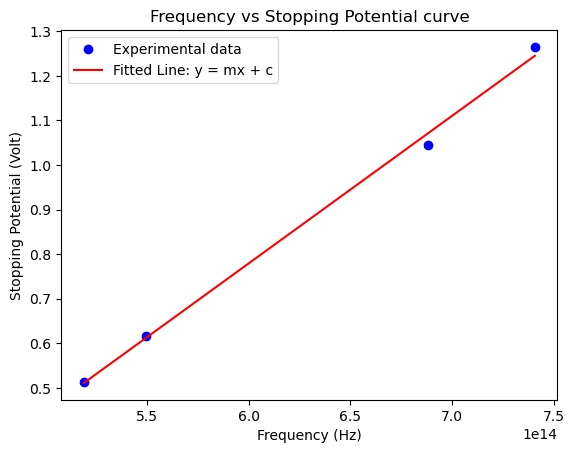

In [36]:
##Plot for Frequency vs Stopping Potential With Linear Least Square Fit
l = [405,436,546,578]
v = [0,0,0,0]
v[0], v[1], v[2], v[3] = abs(df.iloc[2,0]), abs(df.iloc[2,4]), abs(df.iloc[2,8]), abs(df.iloc[3,12])

f=[]
f = np.zeros(4)
for i in range(4):
    f[i] = 3e8/(l[i]*1e-9)
    
print(f)
print(v)

def linear_model(x, m, c):
    return m * x + c

params, covariance = curve_fit(linear_model, f, v)
m, c = params

print("Slope: {:.3e}" .format(m))
print("Intercept: %.3f" %(c))
fitted_line = linear_model(f, *params)
plt.plot(f, v, marker='o', color='b', linestyle='none', label="Experimental data")
plt.plot(f, fitted_line, color='r', label=f"Fitted Line: y = mx + c")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Stopping Potential (Volt)")
plt.title("Frequency vs Stopping Potential curve")
plt.legend()
plt.show()


In [38]:
##Calculation for the Planck's Constant

h = m*1.602e-19
nu = -c/m
lmda = 3e8/nu
print("Obtained Value of Planck's Constant: {:.3e} J·s".format(h))
print("Work Function is: %.3f eV" %(-c))
print("Threshold Frequency is: {:.3e} Hz".format(nu))
print("Threshold Wavelength is: %.3f nm" %(lmda*1e9))


Obtained Value of Planck's Constant: 5.303e-34 J·s
Work Function is: 1.207 eV
Threshold Frequency is: 3.646e+14 Hz
Threshold Wavelength is: 822.787 nm
